# Email Spam - Ham Classifier:

## Life cycle of Machine learning Project :
- 1. Understanding the Problem Statement
- 2. Data Collection
- 3. Data cleaning
- 4. EDA
- 5. Text Preprocessing
- 6. Model Building
- 7. Evaluation
- 8. Choose best model

## 1) Problem statement :
- The goal of this project is to explore, preprocess, and model a dataset of labeled email messages to create an accurate spam filter. Techniques like text vectorization (TF-IDF), feature selection, and classification algorithms such as Naive Bayes, Logistic Regression, and Support Vector Machines will be compared based on performance metrics like accuracy, precision, recall, and F1-score..

## 2) Data Collection :
- Dataset Source - https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
- The data consists of 4 columns and 1000 rows.

## 2.1 Import Data and Required Packages :
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame :

In [3]:
df = pd.read_csv(r'D:\ML-Projects\Spam-Email-Classifier\notebook\data\spam.csv', encoding='windows-1252')

### show any five records :

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
140,ham,"K, text me when you're on the way",NaN,NaN,NaN
3713,ham,"Oh, i will get paid. The most outstanding one ...",NaN,NaN,NaN
3353,ham,R u sure they'll understand that! Wine * good ...,NaN,NaN,NaN
1640,ham,"Alright, we're all set here, text the man",NaN,NaN,NaN
3197,ham,7 lor... Change 2 suntec... Wat time u coming?,NaN,NaN,NaN


### Shape of the dataset :

In [5]:
df.shape

(5572, 5)

## 3. Data cleaning :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


- drop last 3 columns

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1359,ham,&lt;#&gt; %of pple marry with their lovers... ...
2310,spam,You have won a Nokia 7250i. This is what you g...
324,ham,No problem. How are you doing?
4997,ham,Can you talk with me..
2285,ham,"Hi, wkend ok but journey terrible. Wk not good..."


- renaming the columns:

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3438,ham,"awesome, how do I deal with the gate? Charles ..."
2595,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
4975,ham,You are gorgeous! keep those pix cumming :) th...
4981,ham,Slept? I thinkThis time ( &lt;#&gt; pm) is no...
310,ham,Today is ACCEPT DAY..U Accept me as? Brother S...


- encoding the target column :

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- cheking missing values :

In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

- check for duplicate values :

In [14]:
d=df.duplicated().sum()
print(d)

403


- remove duplicates :

In [15]:
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

0


In [16]:
df.shape

(5169, 2)

## 4. Exploratory Data Analysis(EDA):

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

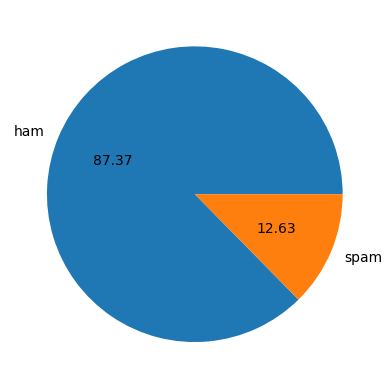

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()
# from the below figure it shows that data is embalanced:

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ayush
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# ham
df[df['target'] == 0]['num_characters'].describe()

count    4516.000000
mean       70.459256
std        56.358207
min         2.000000
25%        34.000000
50%        52.000000
75%        90.000000
max       910.000000
Name: num_characters, dtype: float64

In [24]:
# spam
df[df['target'] == 1]['num_characters'].describe()

count    653.000000
mean     137.891271
std       30.137753
min       13.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      224.000000
Name: num_characters, dtype: float64

<Axes: xlabel='num_characters', ylabel='Count'>

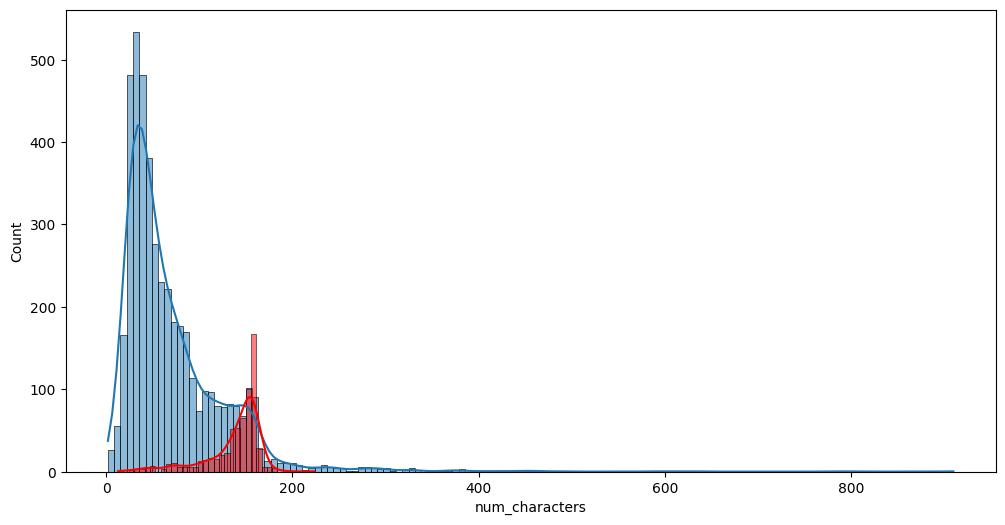

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'],color='red',kde=True)

#### from above results we can observe that spam emails are of generally contains more numbers of characters ..

## 5. Data Preprocessing :

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Lemmatization

In [26]:
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ayush
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ayush
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [28]:
def transform_text(text):
    text = text.lower()                             # Step 1: Lowercase
    text = nltk.word_tokenize(text)                 # Step 2: Tokenization
    
    y = []
    for i in text:
        if i.isalnum():                             # Step 3: Remove punctuation and symbols
            y.append(i)

    text = []
    for i in y:
        if i not in stopwords.words('english'):     # Step 4: Remove stopwords
            text.append(lemmatizer.lemmatize(i))    # Step 5: Lemmatize each word

    return " ".join(text)

In [29]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [30]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though


In [33]:
! pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

#### WordCloud for spam emails :

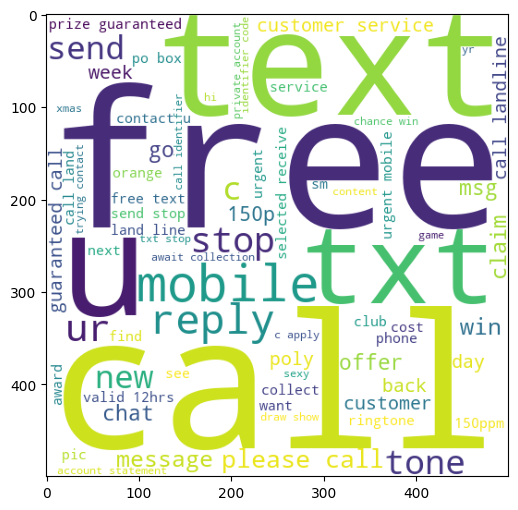

In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

#### WordCloud for ham emails :

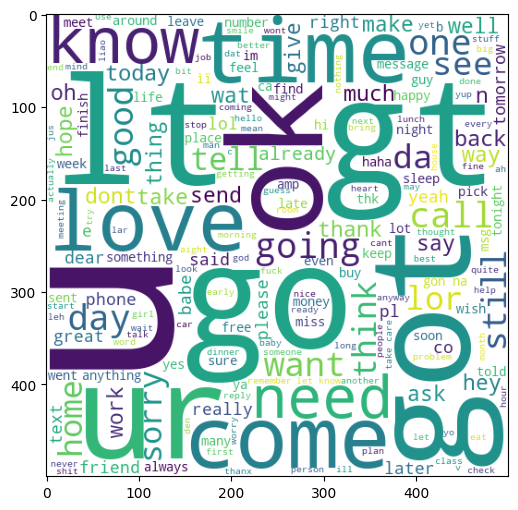

In [36]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

#### top 40 most common words in spam emails:

In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

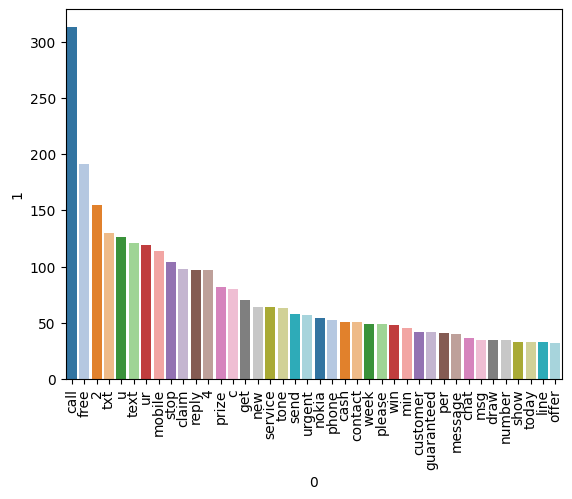

In [39]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(spam_corpus).most_common(40)),x=pd.DataFrame(Counter(spam_corpus).most_common(40))[0],\
        y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1],palette="tab20")
plt.xticks(rotation='vertical')
plt.show()

#### top 40 most common words in ham emails:

In [40]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

35404

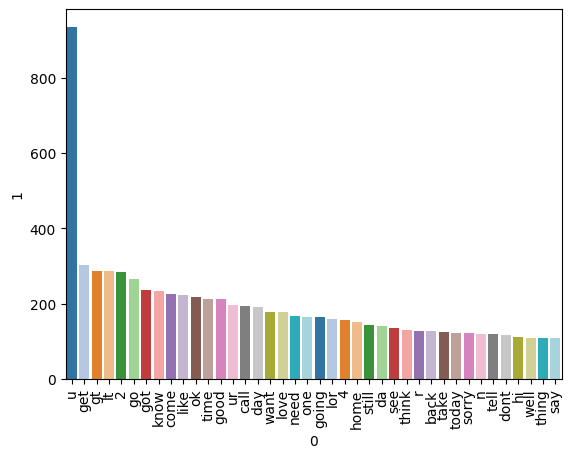

In [42]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(ham_corpus).most_common(40)),x=pd.DataFrame(Counter(ham_corpus).most_common(40))[0],\
        y=pd.DataFrame(Counter(ham_corpus).most_common(40))[1],palette="tab20")
plt.xticks(rotation='vertical')
plt.show()

## 6. Model Building :

In [43]:
df.head()

,target,text,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though


In [44]:
X=df['transformed_text']
y=df['target']

In [45]:
print(X.shape)
print(y.shape)

(5169,)
(5169,)


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
X_train.shape,X_test.shape

((4135,), (1034,))

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=3000,ngram_range=(1,3))       # BOW
tfidf = TfidfVectorizer(max_features=3000,ngram_range=(1,3))    # TfIdf

In [49]:
X_train_cv=cv.fit_transform(X_train).toarray()
X_test_cv=cv.transform(X_test).toarray()

X_train_tfidf=tfidf.fit_transform(X_train).toarray()
X_test_tfidf=tfidf.transform(X_test).toarray()

In [50]:
np.set_printoptions(edgeitems=20, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

X_test_cv

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
print("Gaussian naive baye's for BOW (cv):")
print("--------------------------------------")
gnb.fit(X_train_cv,y_train)
y_pred_cv=gnb.predict(X_test_cv)
print(accuracy_score(y_test,y_pred_cv))
print(confusion_matrix(y_test,y_pred_cv))
print(precision_score(y_test,y_pred_cv))

print('\n')

print("Gaussian naive baye's for TfIdf:")
print("--------------------------------------")

gnb.fit(X_train_tfidf,y_train)
y_pred_tfidf=gnb.predict(X_test_tfidf)
print(accuracy_score(y_test,y_pred_tfidf))
print(confusion_matrix(y_test,y_pred_tfidf))
print(precision_score(y_test,y_pred_tfidf))


Gaussian naive baye's for BOW (cv):
--------------------------------------
0.8558994197292069
[[764 132]
 [ 17 121]]
0.4782608695652174


Gaussian naive baye's for TfIdf:
--------------------------------------
0.8617021276595744
[[769 127]
 [ 16 122]]
0.4899598393574297


In [54]:
print("Multinomial naive baye's for BOW (cv):")
print("--------------------------------------")
mnb.fit(X_train_cv,y_train)
y_pred_cv=mnb.predict(X_test_cv)
print(accuracy_score(y_test,y_pred_cv))
print(confusion_matrix(y_test,y_pred_cv))
print(precision_score(y_test,y_pred_cv))

print('\n')
print("Multinomial naive baye's for TfIdf :")
print("--------------------------------------")

mnb.fit(X_train_tfidf,y_train)
y_pred_tfidf=mnb.predict(X_test_tfidf)
print(accuracy_score(y_test,y_pred_tfidf))
print(confusion_matrix(y_test,y_pred_tfidf))
print(precision_score(y_test,y_pred_tfidf))

Multinomial naive baye's for BOW (cv):
--------------------------------------
0.9748549323017408
[[888   8]
 [ 18 120]]
0.9375


Multinomial naive baye's for TfIdf :
--------------------------------------
0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [55]:
print("Bernoulli naive baye's for BOW (cv):")
print("--------------------------------------")
bnb.fit(X_train_cv,y_train)
y_pred_cv=bnb.predict(X_test_cv)
print(accuracy_score(y_test,y_pred_cv))
print(confusion_matrix(y_test,y_pred_cv))
print(precision_score(y_test,y_pred_cv))

print('\n')

print("Bernoulli naive baye's for TfIdf:")
print("--------------------------------------")

bnb.fit(X_train_tfidf,y_train)
y_pred_tfidf=bnb.predict(X_test_tfidf)
print(accuracy_score(y_test,y_pred_tfidf))
print(confusion_matrix(y_test,y_pred_tfidf))
print(precision_score(y_test,y_pred_tfidf))

Bernoulli naive baye's for BOW (cv):
--------------------------------------
0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


Bernoulli naive baye's for TfIdf:
--------------------------------------
0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


#### here we will go with Multinomial Naive Bayes' for TfIdf vrctorized data...

## Check the accuracy and precision with list of classification algorithms :

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
models={
    "Support Vector Classifier" : SVC(kernel='sigmoid', gamma=1.0),
    "K-Neighbors Classifier" : KNeighborsClassifier(),
    "Multinomial Naive Bayes'" : MultinomialNB(),
    "Decision Tree Classifier" : DecisionTreeClassifier(max_depth=5),
    "Logistic Regression" : LogisticRegression(solver='liblinear', penalty='l1'),
    "RandomForest Classifier" :RandomForestClassifier(n_estimators=50, random_state=2),
    "AdaBoost Classifier" : AdaBoostClassifier(n_estimators=50, random_state=2),
    "Bagging Classifier" : BaggingClassifier(n_estimators=50, random_state=2),
    "Extra Trees Classifier" : ExtraTreesClassifier(n_estimators=50, random_state=2),
    "Gradient Boosting Classifier" : GradientBoostingClassifier(n_estimators=50,random_state=2)
}

model_list = []
accuracy_score_list =[]
precision_score_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_tfidf, y_train) # Train model

    # Make predictions
    y_train_pred_tfidf = model.predict(X_train_tfidf)
    y_test_pred_tfidf = model.predict(X_test_tfidf)
    
    # Evaluate Train and Test dataset
    accuracy_score_train=accuracy_score(y_train,y_train_pred_tfidf)
    accuracy_score_test=accuracy_score(y_test,y_test_pred_tfidf)

    precision_score_train=precision_score(y_train,y_train_pred_tfidf)
    precision_score_test=precision_score(y_test,y_test_pred_tfidf)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- accuracy score: {:.2f}".format(accuracy_score_train))
    print("- precision score: {:.2f}".format(precision_score_train))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- accuracy score: {:.2f}".format(accuracy_score_test))
    print("- precision score: {:.2f}".format(precision_score_test))

    accuracy_score_list.append(accuracy_score_test)
    precision_score_list.append(precision_score_test)
    
    print('='*35)
    print('\n')

Support Vector Classifier
Model performance for Training set
- accuracy score: 0.98
- precision score: 0.98
----------------------------------
Model performance for Test set
- accuracy score: 0.98
- precision score: 0.97


K-Neighbors Classifier
Model performance for Training set
- accuracy score: 0.93
- precision score: 1.00
----------------------------------
Model performance for Test set
- accuracy score: 0.91
- precision score: 1.00


Multinomial Naive Bayes'
Model performance for Training set
- accuracy score: 0.98
- precision score: 1.00
----------------------------------
Model performance for Test set
- accuracy score: 0.97
- precision score: 1.00


Decision Tree Classifier
Model performance for Training set
- accuracy score: 0.95
- precision score: 0.93
----------------------------------
Model performance for Test set
- accuracy score: 0.94
- precision score: 0.91


Logistic Regression
Model performance for Training set
- accuracy score: 0.96
- precision score: 0.95
-----------

In [59]:
performance_df=pd.DataFrame(list(zip(model_list, accuracy_score_list,precision_score_list)), columns=['Model Name', 'Accuracy Score','Precision Score']).sort_values(by=['Precision Score',"Accuracy Score"],ascending=False)
performance_df

,Model Name,Accuracy Score,Precision Score
2,Multinomial Naive Bayes',0.971954,1.000000
1,K-Neighbors Classifier,0.914894,1.000000
5,RandomForest Classifier,0.975822,0.991304
0,Support Vector Classifier,0.975822,0.974790
8,Extra Trees Classifier,0.975822,0.974790
6,AdaBoost Classifier,0.969052,0.949153
9,Gradient Boosting Classifier,0.946809,0.936842
7,Bagging Classifier,0.962282,0.915966
3,Decision Tree Classifier,0.937137,0.910112
4,Logistic Regression,0.946809,0.887850


In [60]:
performance_df1 = pd.melt(performance_df, id_vars = "Model Name")
performance_df1.sort_values(by=["value"],ascending=False)

,Model Name,variable,value
10,Multinomial Naive Bayes',Precision Score,1.000000
11,K-Neighbors Classifier,Precision Score,1.000000
12,RandomForest Classifier,Precision Score,0.991304
2,RandomForest Classifier,Accuracy Score,0.975822
3,Support Vector Classifier,Accuracy Score,0.975822
4,Extra Trees Classifier,Accuracy Score,0.975822
14,Extra Trees Classifier,Precision Score,0.974790
13,Support Vector Classifier,Precision Score,0.974790
0,Multinomial Naive Bayes',Accuracy Score,0.971954
5,AdaBoost Classifier,Accuracy Score,0.969052


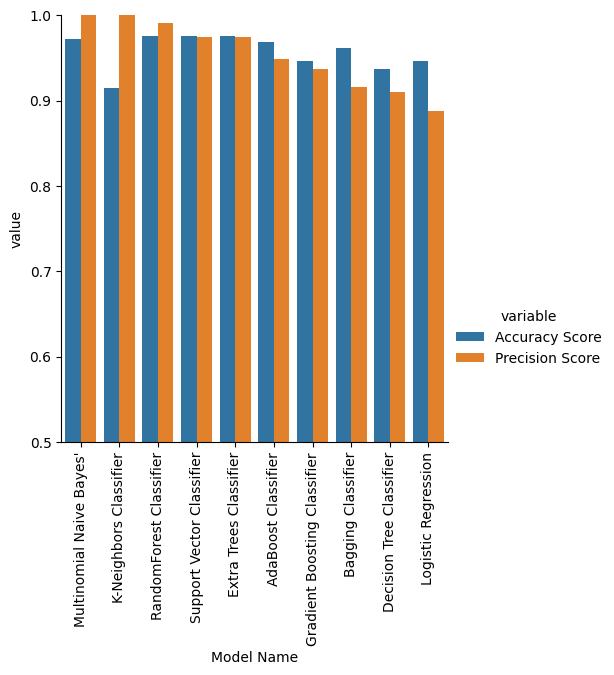

In [61]:
sns.catplot(x = 'Model Name', y='value', 
                hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Why we are choosing Multinomial Naive Bayes' :
- It’s a standard, 
- well-trusted model for TF-IDF/text classification tasks.
- It is faster to train and predict.
- The performance difference (0.3%) is tiny and not worth the extra complexity Random Forest brings.